# 1. The Dataset (20 points)

Our dataset is a table of songs, each with a name, an artist, and a genre.  For each song, we also know how frequently certain words occur in that song.  More precisely, we have a list of approximately 5000 words.  For each of these words, for each song, each item in the table describes the proportion of the song's lyrics that are the particular word.

For example, the lyrics of "In Your Eyes" is 168 words long. The word "like" appears twice:  $\frac{2}{168} \approx 0.0119$ of the words in the song. Similarly, the word "love" appears 10 times: $\frac{10}{168} \approx 0.0595$ of the words. 

Our dataset doesn't contain all information about a song.  For example, it doesn't include the total number of words in each song, or information about the order of words in the song, let alone the melody, instruments, or rhythm. Nonetheless, you may find that word counts alone are sufficient to build an accurate genre classifier.

Run the cell below to read the `lyrics` table. **It may take up to a minute to load.**

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv("lyrics_clean.csv")
df.head()

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
0,Slicker Than Your Average,Craig David,Hip-hop,0.049536,0.017028,0.035604,0.020124,0.007740,0.006192,0.058824,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,Right There,MF Grimm,Hip-hop,0.037825,0.054374,0.023641,0.049645,0.009456,0.016548,0.018913,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,Talkin' All That,Cashis,Hip-hop,0.056738,0.049645,0.051418,0.010638,0.026596,0.033688,0.007092,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,It Only Hurts Me When I Cry,Raul Malo,Country,0.096491,0.074561,0.030702,0.017544,0.026316,0.017544,0.021930,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,Is It Too Late Now,Lester Flatt & Earl Scruggs,Country,0.043902,0.000000,0.073171,0.019512,0.000000,0.014634,0.034146,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


**Question 1.1**: Print the number of rows and columns in the dataset 

In [90]:
print("Row count is:", df.shape[0])

Row count is: 1721


In [91]:
print("Column count is:", df.shape[1])

Column count is: 4979


**Question 1.2**: Find the proportion of the word `like` in the song `In Your Eyes`

In [12]:
in_your_eye_data = df[df["Title"] == 'In Your Eyes']
in_your_eye_data

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
1677,In Your Eyes,Alison Krauss,Country,0.107143,0.0,0.029762,0.0,0.035714,0.029762,0.035714,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [13]:
in_your_eye_data.at[1677, 'like']

0.01190476

**Question 1.3:** Set `expected_row_sum` to the number that you expect will result from summing all proportions in each row, excluding the first three columns. 

In [ ]:
# Set row_sum to a number that's the (approximate) sum of each row of word proportions.
expected_row_sum = 1

Verify your answer by doing sum along the columns for each row

In [14]:
df.sum(axis=1, numeric_only=True)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1716    1.0
1717    1.0
1718    1.0
1719    1.0
1720    1.0
Length: 1721, dtype: float64

## Word Stemming
The columns other than Title, Artist, and Genre in the `lyrics` table are all words that appear in some of the songs in our dataset.  Some of those names have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each song.  

Stemming makes it a little tricky to search for the words you want to use, so we have provided another dataframe that will let you see examples of unstemmed versions of each stemmed word.  Run the code below to load it.

**Question 1.4**: Read the vocabulary from the given file `mxm_reverse_mapping_safe.csv` and store it into a variale `vocab_mapping`

In [97]:
vocab_mapping = pd.read_csv("mxm_reverse_mapping_safe.csv")
vocab_mapping

,Stem,Word
0,día,día
1,pido,pido
2,hatr,hatred
3,pide,pide
4,yellow,yellow
...,...,...
4971,yell,yell
4972,at,at
4973,confess,confess
4974,sincer,sincere


**Question 1.5**: Compare if the number of stemmed words in the vocabulary is the same with one in the song lyrics dataset.

In [98]:
df.loc[:, 'i':].shape[1] ==  vocab_mapping.shape[0]

True

**Question 1.6:** Assign `unchanged` to the **percentage** of words in `vocab_table` that are the same as their stemmed form. 

In [99]:
import numpy as np

row_count = vocab_mapping.shape[0]
row_count

4976

In [100]:
unchanged = np.count_nonzero(vocab_mapping['Stem'] == vocab_mapping['Word']) / row_count
unchanged

0.7216639871382636

**Question 1.7:** Assign `stemmed_message` to the stemmed version of the word "message".

In [101]:
# Set stemmed_message to the stemmed version of "message" (which
# should be a string).  Use vocab_table.
stemmed_message = vocab_mapping[vocab_mapping["Word"]=='message']
stemmed_message

,Stem,Word
4151,messag,message


In [93]:
stemmed_message.loc[4151, "Stem"]

'messag'

**Question 1.8:** Assign `unstemmed_singl` to the word in `vocab_table` that has "singl" as its stemmed form. (*Note that multiple English words may stem to "singl", but only one example appears in `vocab_table`.*)

In [102]:
# Set unstemmed_singl to the unstemmed version of "single" (which
# should be a string).
unstemmed_singl = vocab_mapping[vocab_mapping["Stem"]=='singl']
unstemmed_singl

,Stem,Word
4254,singl,single


In [95]:
unstemmed_singl.loc[4254, "Word"]

'single'

**Question 1.9:** What word in `vocab_table` was shortened the most by this stemming process? Assign `most_shortened` to the word. *hint: function len(str) will return the length of the input string `str`. You will do a loop over rows of the vocabulary to compute the length of each word.*

In [118]:
length_of_stems = []
length_of_words = []
for index, row in vocab_mapping.iterrows():
    st_length = len(row['Stem'])
    length_of_stems.append(st_length)
    w_length = len(row['Word'])
    length_of_words.append(w_length)
    
vocab_mapping["Stem length"] = length_of_stems
vocab_mapping["Word length"] = length_of_words
vocab_mapping

,Stem,Word,Stem length,Word length,Difference
0,día,día,3,3,4
1,pido,pido,4,4,3
2,hatr,hatred,4,6,1
3,pide,pide,4,4,3
4,yellow,yellow,6,6,1
...,...,...,...,...,...
4971,yell,yell,4,4,3
4972,at,at,2,2,5
4973,confess,confess,7,7,0
4974,sincer,sincere,6,7,0


In [119]:
vocab_mapping["Difference"] = (vocab_mapping["Word length"] - vocab_mapping["Stem length"]).abs()
vocab_mapping

,Stem,Word,Stem length,Word length,Difference
0,día,día,3,3,0
1,pido,pido,4,4,0
2,hatr,hatred,4,6,2
3,pide,pide,4,4,0
4,yellow,yellow,6,6,0
...,...,...,...,...,...
4971,yell,yell,4,4,0
4972,at,at,2,2,0
4973,confess,confess,7,7,0
4974,sincer,sincere,6,7,1


In [120]:
vocab_mapping["Difference"].max()

7

In [121]:
vocab_mapping[vocab_mapping["Difference"] == vocab_mapping["Difference"].max()]

,Stem,Word,Stem length,Word length,Difference
983,intern,international,6,13,7


## Splitting the dataset
We're going to use our `lyrics` dataset for three purposes.  First, we want to *train* various song genre classifiers.  Second, we want to *validate* which classifier is most effective. Finally, we want to *test* the performance of our final classifier. Hence, we need three different datasets: *training*, *validation*, and *test*.

The purpose of a classifier is to generalize to unseen data that is similar to the training data. Therefore, we must ensure that there are no songs that appear in two different sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  We just take the top for training, the next part for validation, and the last for test. 

**Question 1.10**: Split the data with the ratio `80%` for training and `20%` for testing. 

In [204]:
# Here we have defined the proportion of our data
# that we want to designate for training as 11/16ths
# of our total dataset.  2/16ths of the data is
# reserved for validation.  The remaining 3/16ths
# will be used for testing.

training_proportion = 0.8
num_songs = lyrics.shape[0]

num_train = int(num_songs * training_proportion)
num_test = num_songs - num_train

print("Num song:", num_songs)

print("Num train:", num_train)
print("Num test:", num_test)

Num song: 1721
Num train: 1376
Num test: 345


In [205]:
train_lyrics = lyrics[:num_train]
test_lyrics = lyrics[num_train:]

print("Training: ", train_lyrics.shape[0], "; Test: ", test_lyrics.shape[0])

Training:  1376 ; Test:  345


**Question 1.11**: Draw a horizontal bar chart with three bars that shows the proportion of Country songs in each of the training and testing datasets.

In [141]:
training_country_song_count = train_lyrics[train_lyrics["Genre"] == "Country"].shape[0]
training_country_song_count

703

In [142]:
training_country_song_proportion = training_country_song_count / train_lyrics.shape[0]
training_country_song_proportion

0.5109011627906976

In [143]:
test_country_song_count = test_lyrics[test_lyrics["Genre"] == "Country"].shape[0]
test_country_song_count

178

In [144]:
test_country_song_proportion = test_country_song_count / test_lyrics.shape[0]
test_country_song_proportion

0.5159420289855072

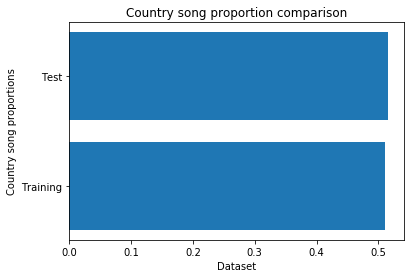

In [145]:
import matplotlib.pyplot as plt


datasets = ['Training', 'Test']
country_song_proportions = [training_country_song_proportion, test_country_song_proportion]

plt.barh(datasets, country_song_proportions)
plt.xlabel("Dataset")
plt.ylabel("Country song proportions")
plt.title("Country song proportion comparison")

plt.show()

# 2. K-Nearest Neighbors (20 points)

K-Nearest Neighbors (k-NN) is a classification algorithm.  Given some *features* of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples.  

A feature we have about each song is *the proportion of times a particular word appears in the lyrics*, and the categories are two music genres: hip-hop and country.  The algorithm requires many previously seen examples for which both the features and categories are known: that's the `train_lyrics` table.

We're going to visualize the algorithm, instead of just describing it. To get started, let's pick colors for the genres.

In [146]:
# Just run this cell to define genre_color.

def genre_color(genre):
    """Assign a color to each genre."""
    if genre == 'Country':
        return 'gold'
    elif genre == 'Hip-hop':
        return 'blue'
    else:
        return 'green'

In [147]:
genre_color('Country')

'gold'

In [148]:
genre_color('Hip-hop')

'blue'

## Classifying a  song

In k-NN, we classify a song by finding the `k` songs in the *training set* that are most similar according to the features we choose. We call those songs with similar features the "neighbors".  The k-NN algorithm assigns the song to the most common category among its `k` neighbors.

Let's limit ourselves to just 2 features for now, so we can plot each song.  The features we will use are the proportions of the words "like" and "love" in the lyrics.  Taking the song "In Your Eyes" (in the test set), 0.0119 of its words are "like" and 0.0595 are "love". This song appears in the test set, so let's imagine that we don't yet know its genre.

First, we need to make our notion of similarity more precise.  We will say that the *dissimilarity*, or *distance* between two songs is the straight-line distance between them when we plot their features in a scatter diagram. This distance is called the Euclidean ("yoo-KLID-ee-un") distance.  

For example, in the song *Insane in the Brain* (in the training set), 0.0203 of all the words in the song are "like" and 0 are "love".  Its distance from *In Your Eyes* on this 2-word feature set is $\sqrt{(0.0119 - 0.0203)^2 + (0.0595 - 0)^2} \approx 0.06$.  (If we included more or different features, the distance could be different.)

A third song, *Sangria Wine* (in the training set), is 0.0044 "like" and 0.0925 "love".



**Question 2.1**: Define a function that creates a plot to display a test song and some training songs in a two-dimensional space defined by two features. Utilize the function to visualize the songs *In Your Eyes*, *Sangria Wine*, and *Insane in the Brain*.

hint: the function has four arguments and it does not return anything but it plots the songs in 2D space:

* test_song: has string datatype, is the name of a song
* training_songs: has list datatype, is a list of songs
* x_feature: has string datatype, is the name of a feature.
* y_feature: has string datatype, is the name of another feature.

In [149]:
import matplotlib.pyplot as plt

def plot_with_two_features(test_song, training_songs, x_feature, y_feature):
    """Plot a test song and training songs using two features."""
    like_prob = lyrics.loc[lyrics["Title"] == test_song, "like"].values[0]
    love_prob = lyrics.loc[lyrics["Title"] == test_song, "love"].values[0]
    genre = lyrics.loc[lyrics["Title"] == test_song, "Genre"].values[0]
    shown_color = genre_color(genre)
    plt.scatter(x=like_prob, y=love_prob, color=shown_color, s=200, alpha=0.4)
    
    # plot for training data
    for song in training_songs:
        like_prob = lyrics.loc[lyrics["Title"] == song, "like"].values[0]
        love_prob = lyrics.loc[lyrics["Title"] == song, "love"].values[0]
        genre = lyrics.loc[lyrics["Title"] == song, "Genre"].values[0]
        shown_color = genre_color(genre)
        plt.scatter(x=like_prob, y=love_prob, color=shown_color, s=200)

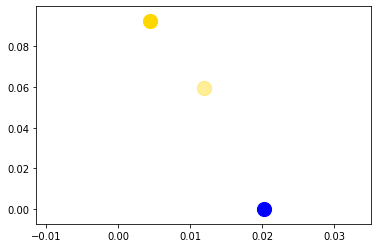

In [150]:
training = ["Sangria Wine", "Insane In The Brain"]
test_song = "In Your Eyes"
plot_with_two_features(test_song, training, "like", "love")

**Question 2.2**: Utilize the `plot_with_two_features` function and plot the positions of the three songs *Sangria Wine*, *Lookin' for Love*, *Insane In The Brain* together with the song *In Your Eyes*. Which one is closer to *In Your Eyes* and what is its genre?

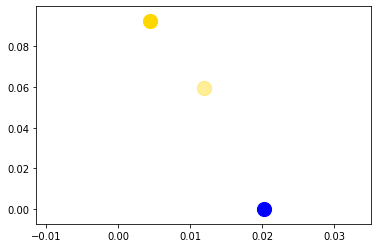

In [153]:
training = ["Sangria Wine", "Lookin' for Love",  "Insane In The Brain"]
plot_with_two_features("In Your Eyes", training, "like", "love")

Anser: *Lookin' for Love* is cloest to *In Your Eyes* and they both have the same genre *country*

**Question 2.3.** Complete the function `distance_two_features` that computes the Euclidean distance between any two songs, using two features. Utilize the function `distance_two_features`  to show that *Lookin' for Love* is closer to *In Your Eyes* than *Insane In The Brain*. 

In [154]:
import math as m

def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two songs, represented as rows."""
    x1_prob = lyrics.loc[lyrics["Title"] == title0, x_feature].values[0]
    y1_prob = lyrics.loc[lyrics["Title"] == title0, y_feature].values[0]

    x2_prob = lyrics.loc[lyrics["Title"] == title1, x_feature].values[0]
    y2_prob = lyrics.loc[lyrics["Title"] == title1, y_feature].values[0]
    
    distance = m.sqrt( (x1_prob-x2_prob)**2 + (y1_prob-y2_prob)**2 )
    
    return distance

In [155]:
for song in ["Lookin' for Love", "Insane In The Brain"]:
    song_distance = distance_two_features(song, "In Your Eyes", "like", "love")
    print(song, 'distance:\t', song_distance)

Lookin' for Love distance:	 0.017854025951587398
Insane In The Brain distance:	 0.060108782340654685


The nearest neighbor to a song is the example in the training set that has the smallest distance from that song.

**Question 2.4.**  What are the names and genres of the 7 closest songs to "In Your Eyes" in  `train_lyrics`, by Euclidean distance for the 2 features "like" and "love"?  To answer this question, make a dataframe named `close_songs` containing those 7 songs with columns "Title", "Artist", "Genre", "like", and "love" from the `lyrics` dataframe, as well as a column called `distance` that contains the distance from "In Your Eyes" **sorted in ascending order**.

In [156]:
like_love = train_lyrics[["Title", "Artist", "Genre", "like", "love"]]
close_songs = like_love.copy()

distances = []
for index, row in close_songs.iterrows():
    distance_to_in_your_eyes = distance_two_features(row['Title'], "In Your Eyes", "like", 'love')
    distances.append(distance_to_in_your_eyes)
#     break
    
close_songs["Distance"] = distances

close_songs = close_songs.nsmallest(7, 'Distance')
close_songs

,Title,Artist,Genre,like,love,Distance
565,In Your Eyes,Alison Krauss,Country,0.011905,0.059524,0.000000
412,Dear Life,Anthony Hamilton,Hip-hop,0.009132,0.054795,0.005482
477,If This Isn't Love,Jennifer Hudson,Hip-hop,0.008869,0.053215,0.007001
896,Southern Loving,Jim Ed Brown & The Browns,Country,0.004237,0.063559,0.008665
73,My Maria,B.W. Stevenson,Country,0.005917,0.053254,0.008669
627,Love Come Down,"Evelyn Champagne"" King""",Hip-hop,0.000000,0.059471,0.011905
262,Big Red Rocket Of Love,Reverend Horton Heat,Hip-hop,0.000000,0.057692,0.012045


**Question 2.5 .** Find the most common value in the column `Genre` of the dataframe `close_songs`. In case of a tie, it can return any of the most common values.

In [159]:
close_songs['Genre'].mode().values[0]

'Hip-hop'

Congratulations are in order -- you've classified your first song!

# 3. Features (20 points)

Now, we're going to extend our classifier to consider more than two features at a time.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two songs, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

#### Question 3.1
Write a function to compute the Euclidean distance between two **arrays** of features of *arbitrary* (but equal) length.  Use it to compute the distance between the first song in the training set and the first song in the test set, *using all of the features*.  (Remember that the title, artist, and genre of the songs are not features.)

**Hint:** The function has two arguments which are two arrays representing the two lists of features: 

In [160]:
import numpy as np

def distance(features1, features2):
    """The Euclidean distance between two arrays of feature values."""
    abs_diff = np.abs(features1 - features2)
    squared = np.square(abs_diff)
    
    sum_squared = np.sum(squared)
    
    return np.sqrt(sum_squared)



In [161]:
first_song_features = train_lyrics.loc[0, 'i':].values
first_song_features

array([0.0, 0.01408451, 0.04694836, ..., 0.0, 0.0, 0], dtype=object)

In [165]:
second_song_features = test_lyrics.loc[num_train, 'i':].values
second_song_features

array([0.055, 0.005, 0.03, ..., 0.0, 0.0, 0], dtype=object)

In [166]:
distance_first_to_first = distance(first_song_features, second_song_features)
distance_first_to_first

0.23481926047058366

## Creating your own feature set

Unfortunately, using all of the features has some downsides.  One clear downside is *computational* -- computing Euclidean distances just takes a long time when we have lots of features.  You might have noticed that in the last question!

So we're going to select just 20.  We'd like to choose features that are very *discriminative*. That is, features which lead us to correctly classify as much of the test set as possible.  This process of choosing features that will make a classifier work well is sometimes called *feature selection*, or more broadly *feature engineering*.

#### Question 3.2
Look through the list of features (the labels of the `lyrics` table after the first three).  Choose 20 common words that you think might let you distinguish between country and hip-hop songs. Make sure to choose words that are frequent enough that every song contains at least one of them. Don't just choose the 20 most frequent, though... you can do much better.

The first time you answer this question, spend some time looking through the features, but not more than 15 minutes.

#### Question 3.3
In two sentences or less, describe how you selected your features. 

#### Question 3.4
Use the `distance` function developed above to compute the distance from the first song in the test set to all the songs in the training set, **using your set of 20 features**.  Make a new dataframe called `genre_and_distances` with one row for each song in the training set and two columns:
* The `"Genre"` of the training song
* The `"Distance"` from the first song in the test set 

Ensure that `genre_and_distances` is **sorted in increasing order by distance to the first test song**.

Note: The asnwer below selected first 20 features

In [177]:
feature_labels = test_lyrics.columns[3:23].values
feature_labels

array(['i', 'the', 'you', 'to', 'and', 'a', 'me', 'it', 'not', 'in', 'my',
       'is', 'of', 'your', 'that', 'do', 'on', 'are', 'we', 'am'],
      dtype=object)

In [179]:
test_song_features = test_lyrics.loc[num_train, feature_labels]
test_song_features

i       0.055
the     0.005
you      0.03
to      0.015
and      0.01
a       0.085
me      0.015
it          0
not     0.005
in      0.025
my      0.005
is      0.005
of       0.08
your     0.01
that     0.01
do          0
on          0
are         0
we          0
am      0.005
Name: 1376, dtype: object

In [180]:
test_song_features = test_lyrics.loc[num_train, feature_labels]

genre_and_distances = train_lyrics[["Genre"]].copy()
distances_to_test_song = []
for index, row in train_lyrics.iterrows():
    features = row.loc[feature_labels]
    the_distance = distance(test_song_features, features)
    distances_to_test_song.append(the_distance)
    
genre_and_distances["Distance"] = distances_to_test_song
genre_and_distances = genre_and_distances.sort_values(['Distance'], ascending=True)
genre_and_distances

,Genre,Distance
711,Country,0.070634
861,Hip-hop,0.074424
425,Country,0.077227
122,Country,0.082539
524,Hip-hop,0.083600
...,...,...
159,Country,0.236755
305,Country,0.239855
1138,Country,0.243413
337,Country,0.245815


#### Question 3.5
Now compute the 5-nearest neighbors classification of the first song in the test set.  That is, decide on its genre by finding the most common genre among its 5 nearest neighbors, according to the distances you've calculated.  Then check whether your classifier chose the right genre.  (Depending on the features you chose, your classifier might not get this song right, and that's okay.)

In [182]:
genre_and_distances = genre_and_distances.nsmallest(5, "Distance")
genre_and_distances

,Genre,Distance
711,Country,0.070634
861,Hip-hop,0.074424
425,Country,0.077227
122,Country,0.082539
524,Hip-hop,0.083600


In [183]:
genre_and_distances['Genre'].mode().values[0]

'Country'

## A classifier function

Now it's time to write a single function that encapsulates this whole process of classification.

**Question 3.6.** Write a function called `classify`.  It should take the following arguments:
* An array of features for a song to classify ,
* A dataframe has similar structure of the original dataset,
* `k`, the number of neighbors to use in classification.

It should return the class your classifier picks for the given row of features (e.g., `'Country'` or `'Hip-hop'`). Test if the function works by classifying the first song in the test set using k=5.

In [185]:
def classify(test_features, train_dataframe, k):
    """Return the most common class among k nearest neigbors to test_row."""
    feature_labels = train_dataframe.columns[3:23].values

    genre_and_distances = train_dataframe[["Genre"]].copy()
    distances_to_test_song = []
    for index, row in train_dataframe.iterrows():
        features = row.loc[feature_labels]
        the_distance = distance(test_features, features)
        distances_to_test_song.append(the_distance)
    
    genre_and_distances["Distance"] = distances_to_test_song
    genre_and_distances = genre_and_distances.nsmallest(k, "Distance")

    return genre_and_distances['Genre'].mode().values[0]

In [191]:
feature_labels = test_lyrics.columns[3:23].values
test_song_features = test_lyrics.loc[num_train, feature_labels]
test_song_features

i       0.055
the     0.005
you      0.03
to      0.015
and      0.01
a       0.085
me      0.015
it          0
not     0.005
in      0.025
my      0.005
is      0.005
of       0.08
your     0.01
that     0.01
do          0
on          0
are         0
we          0
am      0.005
Name: 1376, dtype: object

In [192]:
classify(test_song_features, train_lyrics, k=5)

'Country'

**Question 3.7.** Assign `grandpa_genre` to the genre predicted by your classifier for the song  "Grandpa Got Runned Over By A John Deere", using 9 neigbors.

In [200]:
feature_labels = test_lyrics.columns[3:23].values
test_song = lyrics.loc[lyrics["Title"] == "Grandpa Got Runned Over By A John Deere"]
test_song

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
124,Grandpa Got Runned Over By A John Deere,Cledus T. Judd,Country,0.015707,0.015707,0.010471,0.005236,0.036649,0.026178,0.010471,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [201]:
test_song_features = test_song.loc[124, feature_labels]
test_song_features

i       0.0157068
the     0.0157068
you     0.0104712
to      0.0052356
and     0.0366492
a        0.026178
me      0.0104712
it      0.0157068
not     0.0052356
in      0.0104712
my      0.0052356
is      0.0052356
of      0.0104712
your            0
that    0.0104712
do              0
on      0.0209424
are     0.0052356
we       0.026178
am              0
Name: 124, dtype: object

In [202]:
classify(test_song_features, train_lyrics, k=9)

'Hip-hop'

## Evaluating your classifier

Now that it's easy to use the classifier, let's see how accurate it is on the whole test set. But we will reduce the test set to 20 songs only to save computing power.

**Question 3.8.** Generate a new test set of 20 songs from your current test set

In [203]:
test_lyrics = test_lyrics.sample(20)
test_lyrics

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
1509,Will You Miss Me,The Notting Hillbillies,Country,0.051282,0.051282,0.095238,0.003663,0.000000,0.032967,0.109890,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1503,Sista Big Bones,Anthony Hamilton,Hip-hop,0.062791,0.013953,0.062791,0.034884,0.011628,0.037209,0.002326,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1531,If You Only Knew,Jurassic 5,Hip-hop,0.027027,0.045946,0.045946,0.029730,0.032432,0.013514,0.013514,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1668,I Found A Letter,Allison Moorer,Country,0.073684,0.031579,0.031579,0.021053,0.021053,0.021053,0.021053,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1660,Old Five And Dimers Like Me,Jerry Jeff Walker,Country,0.056962,0.006329,0.006329,0.025316,0.063291,0.006329,0.037975,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1483,Got Ur Self A...,Nas,Hip-hop,0.059055,0.043307,0.043307,0.011811,0.017060,0.047244,0.005249,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1431,Whatcha Wanna Do,Mia X,Hip-hop,0.007380,0.003690,0.000000,0.007380,0.029520,0.022140,0.029520,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1389,Way Back When,Buck 65,Hip-hop,0.025974,0.012987,0.051948,0.038961,0.000000,0.012987,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1589,Thin Line,Jurassic 5,Hip-hop,0.034884,0.032946,0.034884,0.019380,0.025194,0.029070,0.003876,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1395,Lady's Man,Hank Snow,Country,0.087786,0.034351,0.007634,0.015267,0.015267,0.049618,0.034351,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


**Question 3.9.** Classify every song in the newly generated test set, then compute the proportion of correct classifications. (It may take some minutes to complete the classification of these 20 songs)

At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.


# 4. Feature design (15 points)

One way to interpret the accuracy of a classifier is to compare it to another classifier.

**Question 4.1.** Below we've provided 10 features selected by the staff `["come", "do", "have", "heart", "make", "never", "now", "wanna", "with", "yo"]`.  Build a 5-nearest-neighbor classifier using these features and compute its accuracy on the test set. 

**Question 4.2.** Are the features you chose better or worse than the staff features at classifying the test set? Why do you think this is so?

**Question 4.3.** Is there anything random about a classifier's accuracy measured in this way?  Is it possible that the difference in classifier performance is due to chance?  If so, describe (in 2-3 sentences) how you would investigate that.

# 5. Computational thinking (15 points)

**<span style="color:red">The following questions are answered via a video of no more than 5 minutes. Everybody must speak. You will provide the link to that video in the answer box.</span>**

**Question 5.1**: Specifically refer to some lines of code, or the thought processes that you made in all the above solutions to elaborate computational concepts which are used in solving the project.

**Question 5.2**: How did you work as a team to complete the project?